# ¿Cómo puedo abordar el problema del control con plantas cuyos parámetros son variables?

Se presenta un diseño siguiendo el enfoque de control robusto

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import control as ctrl

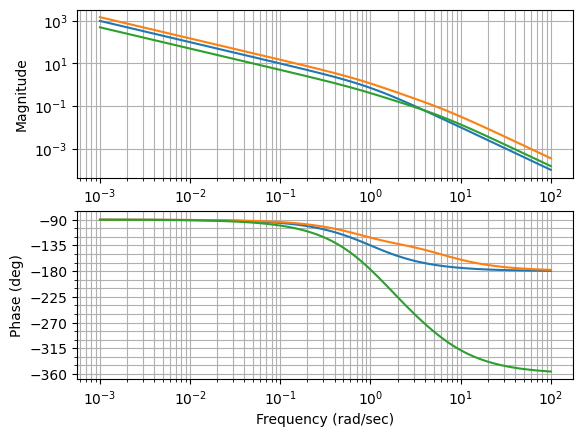

In [9]:
w = np.logspace(-3,2,100)

# Planta nominal
s = ctrl.tf('s')
G = 1/((s+1)*s)
G.name = 'G'

# Incertidumbre
W = 2.5 * (s+1)/(s+5)
W.name = 'W'

Ge1 = G*(1+W)
Ge1.name = 'Ge1'
Ge2 = G*(1-W)
Ge2.name = 'Ge2'
mag, phase, omega = ctrl.bode([G,Ge1,Ge2],w)



TransferFunction(array([0.1]), array([1. , 1. , 0.1]))

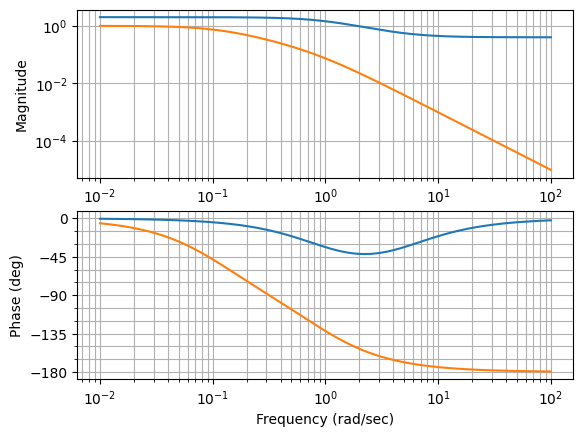

In [16]:
# diseño T

T_lim = 1/W
T_lim.name = 'T_lim'

C = 0.1
#C = (s+1.1)
#C.name = 'C'

T = ctrl.feedback(C*G,1)
T.name="T"
display(T)
mag, phase, omega = ctrl.bode_plot([T_lim,T],plot=True)

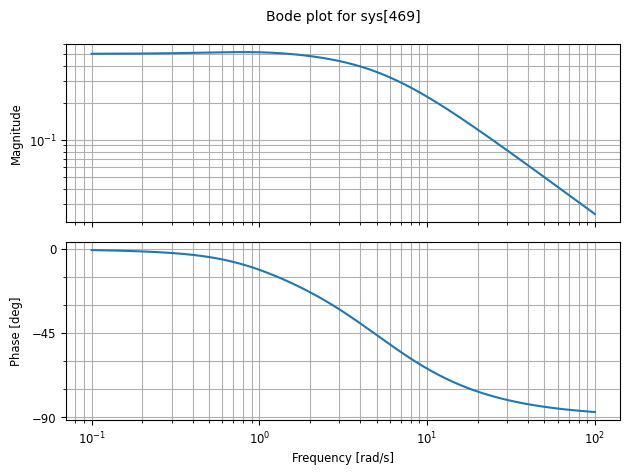

In [ ]:
# Verifico la condicion de estabilidad robusta
ctrl.bode(T*W)

[-7.45538045+0.j         -1.02230978+0.24792355j -1.02230978-0.24792355j]
[-2.72200194+0.j         -0.88899903+0.46900593j -0.88899903-0.46900593j]


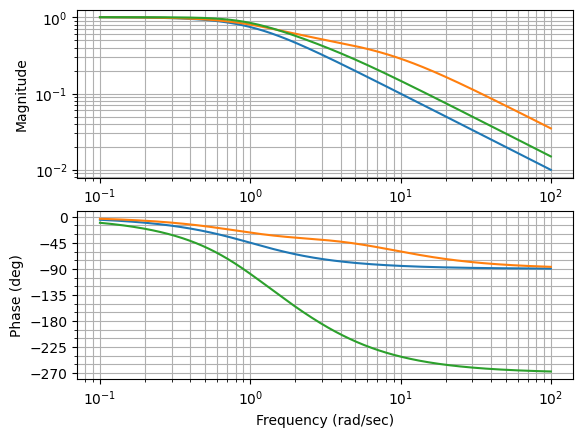

In [11]:
# Veamos los bodes de LC para los modelos extremos

Te1 = ctrl.feedback(C*Ge1,1)
Te1.name='Te1'
print(ctrl.poles(Te1))

Te2 = ctrl.feedback(C*Ge2,1)
Te2.name='Te2'
print(ctrl.poles(Te2))

mag, phase, omega = ctrl.bode([T,Te1,Te2])



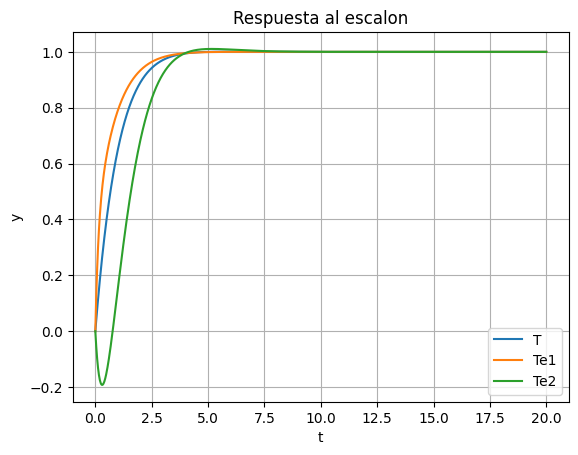

In [12]:
t = np.linspace(0,20,1000)
TT = [T,Te1,Te2]

for Te in TT:
  t,y = ctrl.step_response(Te,t)
  plt.plot(t,y,label=Te.name)

plt.xlabel('t')
plt.ylabel('y')
plt.title('Respuesta al escalon')
plt.grid()
plt.legend()
plt.show()



(array([[-1.00000000e+00+0.j        ,  0.00000000e+00+0.j        ],
        [-9.99208861e-01+0.j        , -8.63422272e-03+0.j        ],
        [-9.98403797e-01+0.j        , -1.72823699e-02+0.j        ],
        [-9.97584403e-01+0.j        , -2.59448478e-02+0.j        ],
        [-9.96750254e-01+0.j        , -3.46220804e-02+0.j        ],
        [-9.95900908e-01+0.j        , -4.33145094e-02+0.j        ],
        [-9.95035905e-01+0.j        , -5.20225962e-02+0.j        ],
        [-9.94154762e-01+0.j        , -6.07468226e-02+0.j        ],
        [-9.93256976e-01+0.j        , -6.94876919e-02+0.j        ],
        [-9.92342021e-01+0.j        , -7.82457308e-02+0.j        ],
        [-9.91409345e-01+0.j        , -8.70214901e-02+0.j        ],
        [-9.90458372e-01+0.j        , -9.58155466e-02+0.j        ],
        [-9.89488497e-01+0.j        , -1.04628505e-01+0.j        ],
        [-9.88499086e-01+0.j        , -1.13460999e-01+0.j        ],
        [-9.87489475e-01+0.j        , -1.2231369

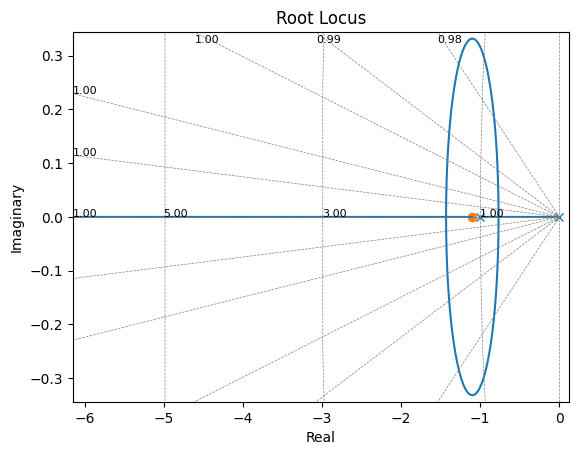

In [13]:
# y el rlocus
ctrl.rlocus(C*G,initial_gain=1)


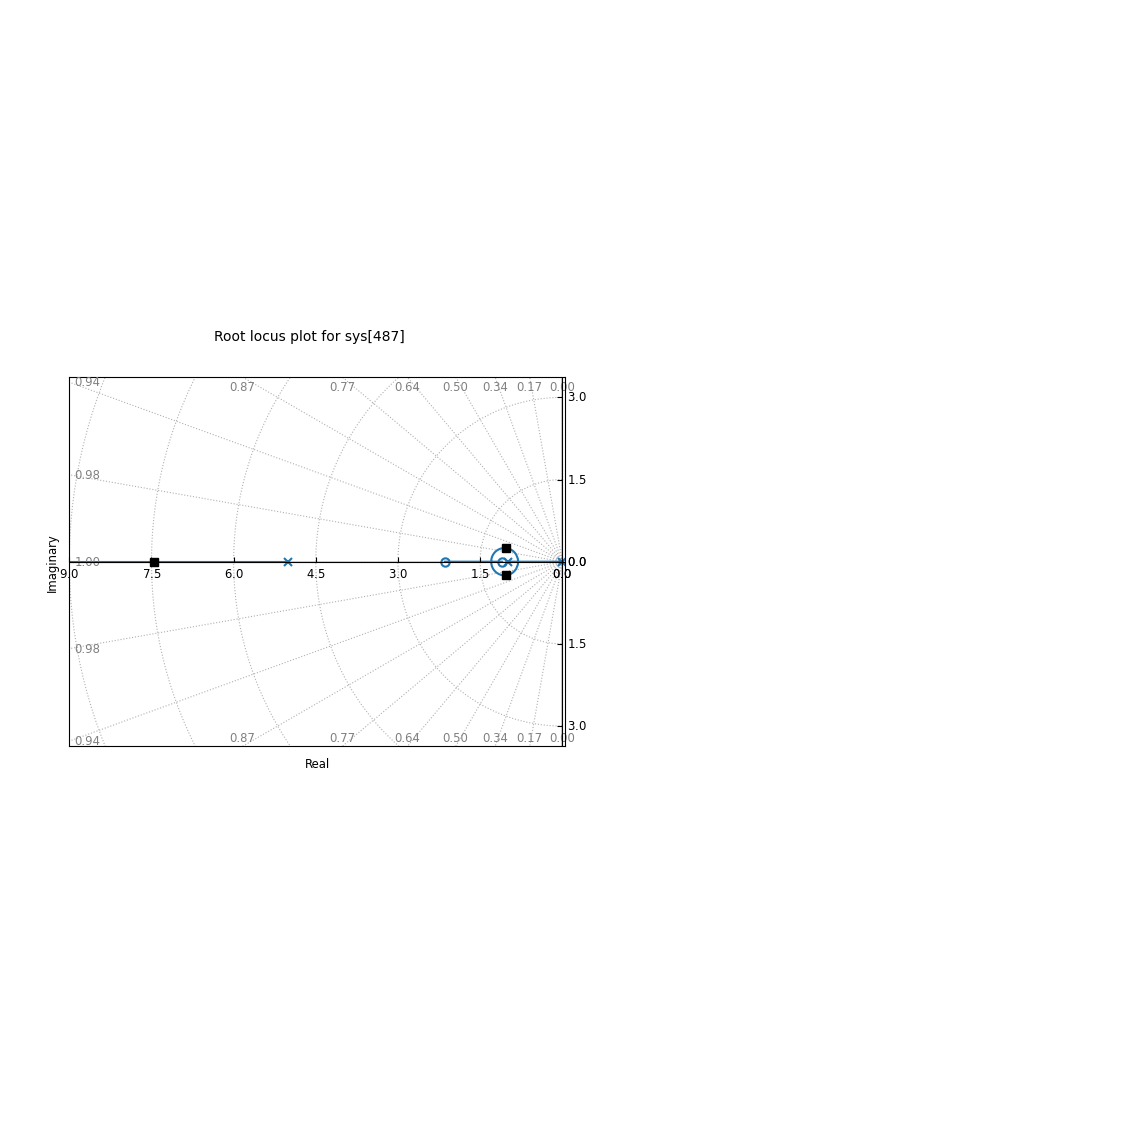

In [ ]:
ctrl.rlocus(C*Ge1,initial_gain=1)


(array([[-5.00000000e+00+0.00000000e+00j, -1.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
        [-4.68865084e+00+0.00000000e+00j, -9.81158678e-01+0.00000000e+00j,
         -9.40911917e-02+0.00000000e+00j],
        [-4.36696211e+00+0.00000000e+00j, -9.52775776e-01+0.00000000e+00j,
         -2.08063536e-01+0.00000000e+00j],
        [-4.28460036e+00+0.00000000e+00j, -9.43177421e-01+0.00000000e+00j,
         -2.40998818e-01+0.00000000e+00j],
        [-4.20135330e+00+0.00000000e+00j, -9.32058482e-01+0.00000000e+00j,
         -2.76340000e-01+0.00000000e+00j],
        [-4.11715541e+00+0.00000000e+00j, -9.18959697e-01+0.00000000e+00j,
         -3.14611852e-01+0.00000000e+00j],
        [-4.03193348e+00+0.00000000e+00j, -9.03177059e-01+0.00000000e+00j,
         -3.56591601e-01+0.00000000e+00j],
        [-3.94560530e+00+0.00000000e+00j, -8.83537235e-01+0.00000000e+00j,
         -4.03534785e-01+0.00000000e+00j],
        [-3.85807813e+00+0.00000000e+00j, -8.57809890e-0

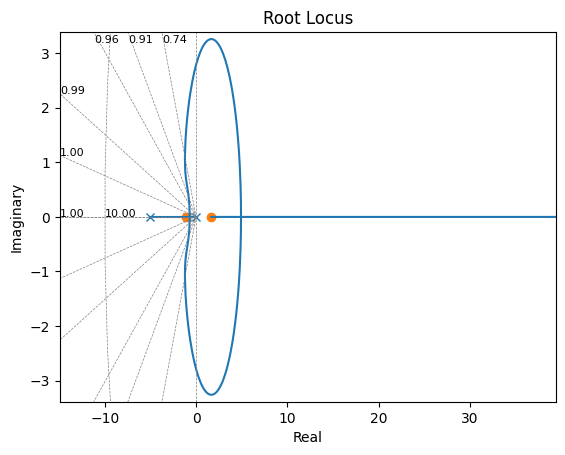

In [14]:
ctrl.rlocus(C*Ge2,initial_gain=1)
